In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2

sys.path.append('../')
from pytvision.datasets.syntheticdata import SyntethicCircleDataset
from pytvision.transforms import transforms as mtrans
from pytvision import visualization as view

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [4]:

def transform_aug():
    return transforms.Compose([

              ## resize and crop                           
              mtrans.ToResize( (400,400), resize_mode='square', padding_mode=cv2.BORDER_REFLECT_101 ) ,
              #mtrans.CenterCrop( (200,200) ),
              #mtrans.RandomCrop( (255,255), limit=50, padding_mode=cv2.BORDER_REFLECT_101  ),
              #mtrans.ToResizeUNetFoV(388, cv2.BORDER_REFLECT_101),         
              
              ## color 
              mtrans.ToRandomChoiceTransform( [
                mtrans.RandomSaturation(),
                mtrans.RandomHueSaturationShift(),
                mtrans.RandomHueSaturation(),
                mtrans.RandomRGBShift(),
                #mtrans.ToNegative(),
                mtrans.RandomRGBPermutation(),
                mtrans.ToRandomTransform( mtrans.ToGrayscale(), prob=0.5 ),
                #mtrans.ToGrayscale(),
              ]),

              ## blur
              #mtrans.ToRandomTransform( mtrans.ToLinealMotionBlur( lmax=1 ), prob=0.5 ),
              #mtrans.ToRandomTransform( mtrans.ToMotionBlur( ), prob=0.5 ),
              mtrans.ToRandomTransform( mtrans.ToGaussianBlur(), prob=0.75 ),
              
              ## geometrical 
              #mtrans.ToRandomTransform( mtrans.HFlip(), prob=0.5 )
              #mtrans.ToRandomTransform( mtrans.VFlip(), prob=0.5 )
              mtrans.RandomScale(factor=0.2, padding_mode=cv2.BORDER_REFLECT101 ),
              #mtrans.RandomGeometricalTransform( angle=360, translation=0.2, warp=0.02, padding_mode=cv2.BORDER_REFLECT101),
              #mtrans.RandomElasticDistort( size_grid=50, padding_mode=cv2.BORDER_REFLECT101 ),
              
               
              ## tensor               
              mtrans.ToTensor(),
              mtrans.RandomElasticTensorDistort( size_grid=10, deform=0.05 ),
              
              ## normalization
              mtrans.ToNormalization(),
              #mtrans.ToWhiteNormalization(),
              #mtrans.ToMeanNormalization(
              #    mean=[0.485, 0.456, 0.406],
              #    std=[0.229, 0.224, 0.225]
              #    ),

            ])



In [7]:
data = SyntethicCircleDataset(
        count=300,
        generate=SyntethicCircleDataset.generate_image_mask_and_weight,
        imsize=(512,612),
        sigma=0.01,
        bdraw_grid=True,
        transform=transform_aug()
        )

dataloader = DataLoader(data, batch_size=3, shuffle=True, num_workers=1 )


0 torch.Size([3, 3, 400, 400]) torch.Size([3, 3, 400, 400]) torch.Size([3, 1, 400, 400])
tensor(0.) tensor(1.0000) torch.Size([3, 3, 400, 400])
tensor(0.) tensor(1.) torch.Size([3, 3, 400, 400])
tensor(0.) tensor(20.7918) torch.Size([3, 3, 400, 400])
torch.Size([3, 3, 400, 400])
[ 0.  1.]
tensor(0.) tensor(1.0000)


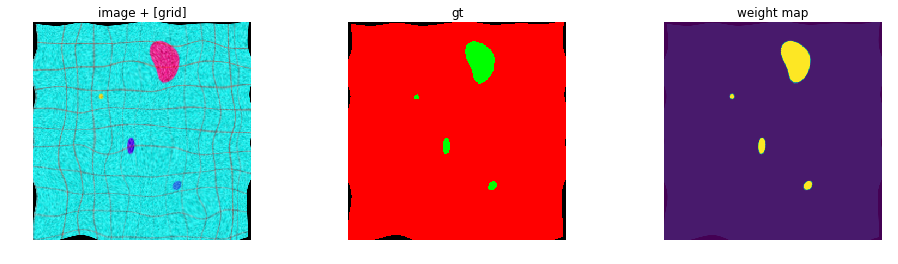

1 torch.Size([3, 3, 400, 400]) torch.Size([3, 3, 400, 400]) torch.Size([3, 1, 400, 400])
tensor(0.) tensor(1.0000) torch.Size([3, 3, 400, 400])
tensor(0.) tensor(1.) torch.Size([3, 3, 400, 400])
tensor(0.) tensor(31.6726) torch.Size([3, 3, 400, 400])
torch.Size([3, 3, 400, 400])
[ 0.  1.]
tensor(0.) tensor(1.0000)


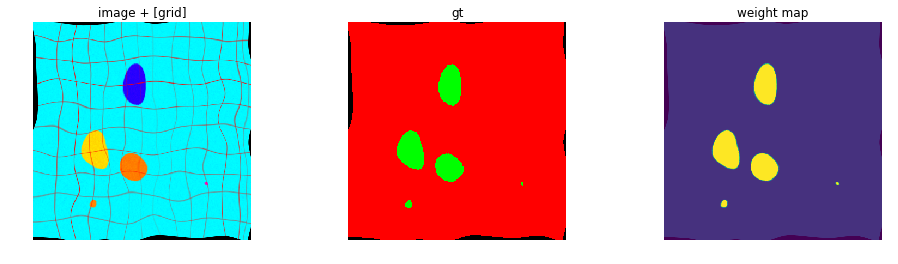

2 torch.Size([3, 3, 400, 400]) torch.Size([3, 3, 400, 400]) torch.Size([3, 1, 400, 400])
tensor(0.) tensor(1.0000) torch.Size([3, 3, 400, 400])
tensor(0.) tensor(1.) torch.Size([3, 3, 400, 400])
tensor(0.) tensor(30.5162) torch.Size([3, 3, 400, 400])
torch.Size([3, 3, 400, 400])
[ 0.  1.]
tensor(0.) tensor(1.0000)


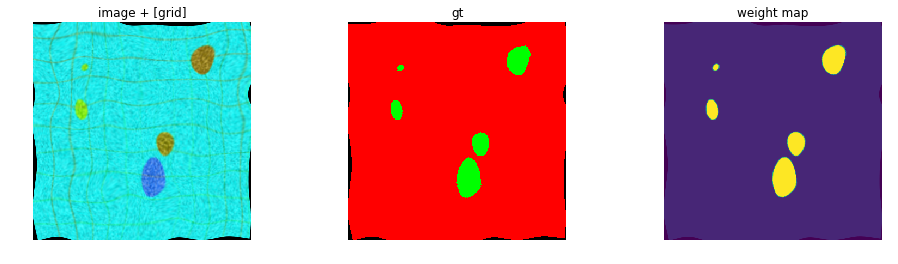

3 torch.Size([3, 3, 400, 400]) torch.Size([3, 3, 400, 400]) torch.Size([3, 1, 400, 400])
tensor(0.) tensor(1.0000) torch.Size([3, 3, 400, 400])
tensor(0.) tensor(1.) torch.Size([3, 3, 400, 400])
tensor(0.) tensor(16.4475) torch.Size([3, 3, 400, 400])
torch.Size([3, 3, 400, 400])
[ 0.  1.]
tensor(0.) tensor(1.0000)


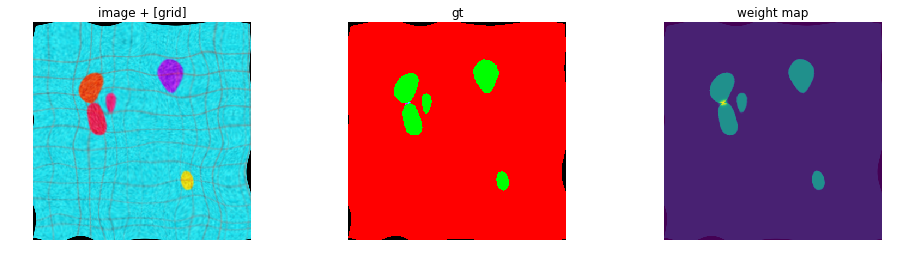

In [10]:
label_batched = []
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size(),
          sample_batched['weight'].size()    
         )
    
    image = sample_batched['image']
    label = sample_batched['label'] 
    weight = sample_batched['weight'] 
    
    print(torch.min(image), torch.max(image), image.shape )
    print(torch.min(label), torch.max(label), image.shape )
    print(torch.min(weight), torch.max(weight), image.shape )

    print(image.shape)
    print(np.unique(label))
    print(image.min(), image.max())
    
    image = image.permute(2,3,1,0)[:,:,:,0].squeeze() 
    label = label.permute(2,3,1,0)[:,:,:,0].squeeze() 
    weight = weight.permute(2,3,1,0)[:,:,:,0].squeeze() 


    plt.figure( figsize=(16,4) )
    plt.subplot(131)
    plt.imshow( image ) 
    plt.title('image + [grid]')
    plt.axis('off')
    plt.ioff()

    plt.subplot(132)
    plt.imshow( label )  
    plt.title('gt')
    plt.axis('off')
    plt.ioff()

    plt.subplot(133)
    plt.imshow( weight )
    plt.title('weight map')
    plt.axis('off')
    plt.ioff()   

    #print('save figure ...')
    #plt.savefig('../out/image_{}.png'.format(i_batch) )

    plt.show()      

    # observe 4th batch and stop.
    if i_batch == 3: 
        break       